In [1]:
import numpy as np 
import pandas as pd 

df = pd.read_csv('taylor_swift_spotify.csv')

df.head()

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,Lavender Haze,Midnights (3am Edition),2022-10-22,1,4g2c7NoTWAOSYDy44l9nub,spotify:track:4g2c7NoTWAOSYDy44l9nub,0.2040,0.735,0.444,0.001200,0.1700,-10.519,0.0684,97.038,0.0984,87,202395
1,1,Maroon,Midnights (3am Edition),2022-10-22,2,199E1RRrVmVTQqBXih5qRC,spotify:track:199E1RRrVmVTQqBXih5qRC,0.0593,0.658,0.378,0.000000,0.0976,-8.300,0.0379,108.034,0.0382,87,218270
2,2,Anti-Hero,Midnights (3am Edition),2022-10-22,3,02Zkkf2zMkwRGQjZ7T4p8f,spotify:track:02Zkkf2zMkwRGQjZ7T4p8f,0.1330,0.638,0.634,0.000001,0.1520,-6.582,0.0457,96.953,0.5190,88,200690
3,3,Snow On The Beach (feat. Lana Del Rey),Midnights (3am Edition),2022-10-22,4,6ADDIJxxqzM9LMpm78yzQG,spotify:track:6ADDIJxxqzM9LMpm78yzQG,0.7350,0.659,0.323,0.003210,0.1160,-13.425,0.0436,110.007,0.1540,86,256124
4,4,"You're On Your Own, Kid",Midnights (3am Edition),2022-10-22,5,7gVWKBcfIW93YxNBi3ApIE,spotify:track:7gVWKBcfIW93YxNBi3ApIE,0.4160,0.694,0.380,0.000008,0.1260,-10.307,0.0614,120.044,0.3760,87,194206


calculating shape -> there 1265 different song entereies in the dataset and 18 features have been given for each song

In [2]:
df.shape

(1265, 18)

checking feature columns for each song

In [3]:
df.columns

Index(['Unnamed: 0', 'name', 'album', 'release_date', 'track_number', 'id',
       'uri', 'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity',
       'duration_ms'],
      dtype='object')

checking null values in columns --> so there are no null values here

In [4]:
df.isnull().sum()

Unnamed: 0          0
name                0
album               0
release_date        0
track_number        0
id                  0
uri                 0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
duration_ms         0
dtype: int64

checking different albums --> there 47 different albums---> we will look into this afterwards

In [5]:
df['album'].value_counts()

folklore: the long pond studio sessions (from the Disney+ special) [deluxe edition]    68
Fearless                                                                               63
Red (Taylor's Version)                                                                 60
reputation Stadium Tour Surprise Song Playlist                                         46
evermore                                                                               45
Red (Deluxe Edition)                                                                   44
Midnights (3am Edition)                                                                40
1989                                                                                   39
1989 (Deluxe)                                                                          38
evermore (deluxe version)                                                              34
folklore (deluxe version)                                                              34
1989 (Delu

checking if there are repeated songs name ---> song names are repeated so we need thire uniques ids

In [6]:
df['name'].value_counts()

The Story Of Us                                      10
Welcome To New York                                   9
Back To December                                      9
I Know Places                                         9
Fifteen                                               9
                                                     ..
Starlight - Instrumental With Background Vocals       1
Begin Again - Instrumental With Background Vocals     1
Getaway Car - Commentary                              1
Gorgeous - Commentary                                 1
The Last Time - Commentary                            1
Name: name, Length: 484, dtype: int64

for numerical modelling we need to drop columns like name,id,uri but for theat we will create a temperory data fram and will start working upon that

In [7]:
temp_df = df.drop(['name','id','uri'],axis = 1)
temp_df

,Unnamed: 0,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,Midnights (3am Edition),2022-10-22,1,0.204000,0.735,0.444,0.001200,0.1700,-10.519,0.0684,97.038,0.0984,87,202395
1,1,Midnights (3am Edition),2022-10-22,2,0.059300,0.658,0.378,0.000000,0.0976,-8.300,0.0379,108.034,0.0382,87,218270
2,2,Midnights (3am Edition),2022-10-22,3,0.133000,0.638,0.634,0.000001,0.1520,-6.582,0.0457,96.953,0.5190,88,200690
3,3,Midnights (3am Edition),2022-10-22,4,0.735000,0.659,0.323,0.003210,0.1160,-13.425,0.0436,110.007,0.1540,86,256124
4,4,Midnights (3am Edition),2022-10-22,5,0.416000,0.694,0.380,0.000008,0.1260,-10.307,0.0614,120.044,0.3760,87,194206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1260,1260,Taylor Swift Karaoke,2006-10-24,10,0.000081,0.475,0.529,0.562000,0.1460,-10.802,0.0317,151.000,0.3010,2,216226
1261,1261,Taylor Swift Karaoke,2006-10-24,11,0.032600,0.528,0.484,0.001650,0.1400,-9.266,0.0316,178.299,0.5850,7,204306
1262,1262,Taylor Swift Karaoke,2006-10-24,12,0.000053,0.541,0.796,0.820000,0.3260,-8.833,0.0306,144.004,0.8470,3,223386
1263,1263,Taylor Swift Karaoke,2006-10-24,13,0.259000,0.575,0.279,0.572000,0.0941,-12.066,0.0286,96.007,0.1180,2,206480


In [8]:
temp_df = temp_df.drop(['album','release_date'],axis = 1)
temp_df

,Unnamed: 0,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,1,0.204000,0.735,0.444,0.001200,0.1700,-10.519,0.0684,97.038,0.0984,87,202395
1,1,2,0.059300,0.658,0.378,0.000000,0.0976,-8.300,0.0379,108.034,0.0382,87,218270
2,2,3,0.133000,0.638,0.634,0.000001,0.1520,-6.582,0.0457,96.953,0.5190,88,200690
3,3,4,0.735000,0.659,0.323,0.003210,0.1160,-13.425,0.0436,110.007,0.1540,86,256124
4,4,5,0.416000,0.694,0.380,0.000008,0.1260,-10.307,0.0614,120.044,0.3760,87,194206
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1260,1260,10,0.000081,0.475,0.529,0.562000,0.1460,-10.802,0.0317,151.000,0.3010,2,216226
1261,1261,11,0.032600,0.528,0.484,0.001650,0.1400,-9.266,0.0316,178.299,0.5850,7,204306
1262,1262,12,0.000053,0.541,0.796,0.820000,0.3260,-8.833,0.0306,144.004,0.8470,3,223386
1263,1263,13,0.259000,0.575,0.279,0.572000,0.0941,-12.066,0.0286,96.007,0.1180,2,206480


mean_normalization of the data

In [9]:
temp_df['popularity'].max(),temp_df['popularity'].min()
temp_df['popularity'] = (temp_df['popularity'] - temp_df['popularity'].mean())/temp_df['popularity'].std()
temp_df['popularity']

0       2.023073
1       2.023073
2       2.065747
3       1.980399
4       2.023073
          ...   
1260   -1.604196
1261   -1.390827
1262   -1.561522
1263   -1.604196
1264   -1.646869
Name: popularity, Length: 1265, dtype: float64

In [10]:
def mean_norm(x):
    return (x - x.mean())/x.std()
temp_df['track_number'] = mean_norm(temp_df['track_number'])

In [11]:
temp_df = temp_df.rename(columns = {'duration_ms':'duration_min'})
temp_df['duration_min'] = temp_df['duration_min']/60000
temp_df

,Unnamed: 0,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_min
0,0,-1.316153,0.204000,0.735,0.444,0.001200,0.1700,-10.519,0.0684,97.038,0.0984,2.023073,3.373250
1,1,-1.178144,0.059300,0.658,0.378,0.000000,0.0976,-8.300,0.0379,108.034,0.0382,2.023073,3.637833
2,2,-1.040136,0.133000,0.638,0.634,0.000001,0.1520,-6.582,0.0457,96.953,0.5190,2.065747,3.344833
3,3,-0.902128,0.735000,0.659,0.323,0.003210,0.1160,-13.425,0.0436,110.007,0.1540,1.980399,4.268733
4,4,-0.764119,0.416000,0.694,0.380,0.000008,0.1260,-10.307,0.0614,120.044,0.3760,2.023073,3.236767
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1260,1260,-0.074077,0.000081,0.475,0.529,0.562000,0.1460,-10.802,0.0317,151.000,0.3010,-1.604196,3.603767
1261,1261,0.063931,0.032600,0.528,0.484,0.001650,0.1400,-9.266,0.0316,178.299,0.5850,-1.390827,3.405100
1262,1262,0.201940,0.000053,0.541,0.796,0.820000,0.3260,-8.833,0.0306,144.004,0.8470,-1.561522,3.723100
1263,1263,0.339948,0.259000,0.575,0.279,0.572000,0.0941,-12.066,0.0286,96.007,0.1180,-1.604196,3.441333


trying to predict the popularity level using the given dataset 
X-> everything except popularity column
y-> popularity column

In [12]:
X = temp_df.drop('popularity',axis = 1)
y = temp_df['popularity']
X = X.to_numpy()
y = y.to_numpy()
y = y.reshape(-1,1)
X.shape,y.shape

((1265, 12), (1265, 1))

first column delete

In [13]:
X = np.delete(X,0,axis = 1)
X.shape

(1265, 11)

Now the feature matrix is ready to be fit into the models
first seperating the feature matrix into test-train split

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1012, 11), (253, 11), (1012, 1), (253, 1))

In [15]:
from sklearn.linear_model import LinearRegression
linear_regression_fitting_data = LinearRegression().fit(X_train,y_train)
linear_regression_fitting_data.score(X_train,y_train)

0.3497171843607475

the score indicated that this is not the best regression model to fit this dataset into

In [16]:
linear_regression_predict = linear_regression_fitting_data.predict(X_test)
linear_regression_predict.shape

(253, 1)

In [17]:
linear_regression_predict = linear_regression_predict.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [18]:
linear_regression_predict

array([[-0.47189479],
       [ 0.26101686],
       [ 0.47674576],
       [-1.29560494],
       [ 0.06216549],
       [-0.51001205],
       [ 0.5636475 ],
       [ 0.23313045],
       [ 0.57611081],
       [ 0.32225101],
       [ 0.36774935],
       [-0.60821942],
       [-0.52595364],
       [ 0.39609354],
       [ 0.29240128],
       [ 0.26469795],
       [-0.10284247],
       [ 0.31402602],
       [ 0.38606152],
       [ 0.18331224],
       [ 0.28512216],
       [ 0.39324689],
       [ 0.33728564],
       [-1.46248553],
       [ 0.37943593],
       [ 0.13412395],
       [ 0.2797823 ],
       [-0.98872363],
       [-0.65947162],
       [ 0.25719474],
       [ 0.37234715],
       [ 0.25869767],
       [-0.58125654],
       [-0.52991265],
       [ 0.07110275],
       [ 0.40019186],
       [ 0.37040047],
       [ 0.36848629],
       [-1.67922636],
       [ 0.18653749],
       [ 0.37246629],
       [ 0.27006444],
       [ 0.39474808],
       [ 0.31563736],
       [-0.38716173],
       [ 0

not a very good plot to make the analysis easier

Text(0, 0.5, 'popularity')

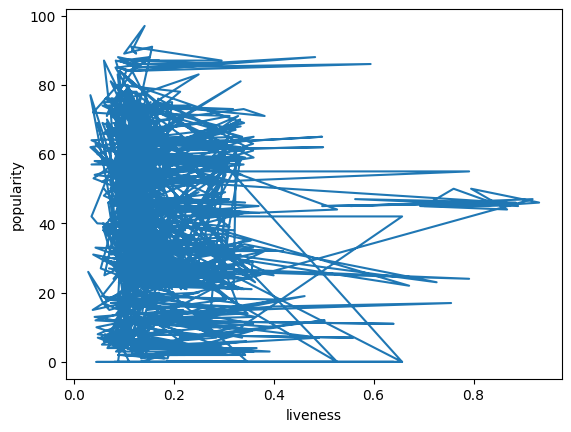

In [19]:
import matplotlib.pyplot as plt
X_plot = df['liveness'].to_numpy()
X_plot = X_plot.reshape(-1,1)
y_plot = df['popularity'].to_numpy()
y_plot = y_plot.reshape(-1,1)
plt.plot(X_plot, y_plot)
plt.xlabel('liveness')
plt.ylabel('popularity')

<AxesSubplot:>

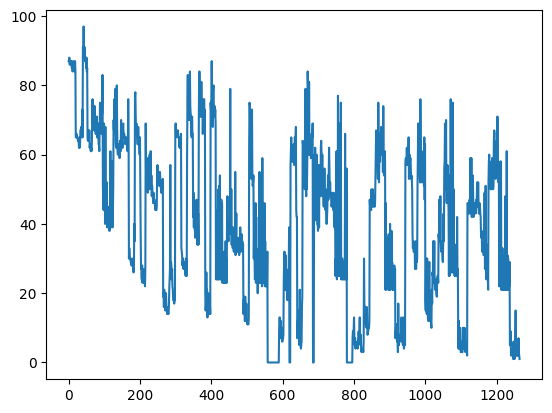

In [20]:
df['popularity'].plot()

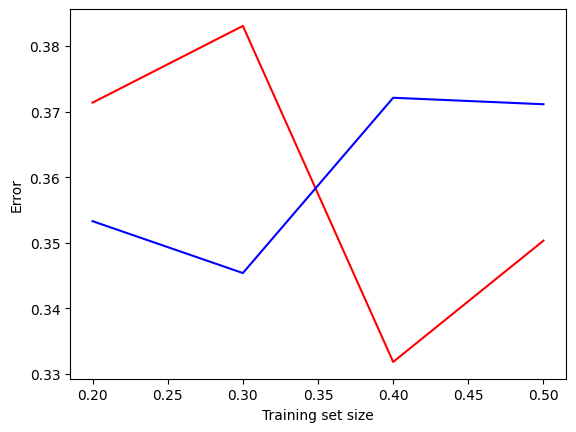

In [21]:
import main as m
plot_learning_curve = m.Learning_Curves(X_train,y_train,1012)